### Score: `[92]`

Q1. `[27]` good!

Q2. `[7]` 处理方式有误。

Q3. `[42]` 3.1注意group，3.9-3.10。

Q4. `[16]` good! 可视化方式的选择可以换一种！

# Assignment#2 ZHAO Dongwei SID:12432909

## 1. Significant earthquakes since 2150 B.C.

The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2024-10-23_09-58-40_+0800.tsv) as an object and name it Sig_Eqs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'earthquakes-2024-10-29_17-19-44_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t')

### 1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [3]:
# Null processing
Sig_Eqs['Total Deaths'] = pd.to_numeric(Sig_Eqs['Total Deaths'], errors='coerce')

country_deaths = Sig_Eqs[['Country', 'Total Deaths']].dropna()

#The 'Total Deaths' sum  by country grouping
country_death_totals = country_deaths.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)

top_20_countries = country_death_totals.head(20)
print(top_20_countries)

Country
CHINA           2042831.0
TURKEY           995648.0
IRAN             758654.0
SYRIA            437700.0
ITALY            422679.0
JAPAN            356605.0
HAITI            323776.0
AZERBAIJAN       310119.0
INDONESIA        282827.0
ARMENIA          189000.0
PAKISTAN         143712.0
ECUADOR          134445.0
TURKMENISTAN     110412.0
PERU              96876.0
PORTUGAL          82572.0
GREECE            82277.0
IRAQ              70200.0
CHILE             70175.0
INDIA             62412.0
TAIWAN            57723.0
Name: Total Deaths, dtype: float64


### 1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/

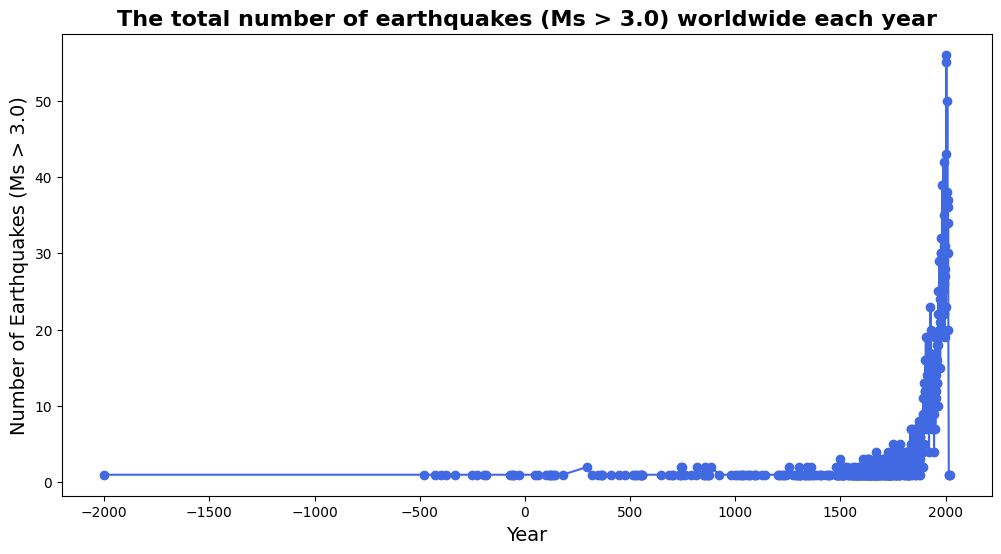

In [4]:
Sig_Eqs['Ms'] = pd.to_numeric(Sig_Eqs['Ms'], errors='coerce')

# 过滤出震级 Ms 大于 3.0 的地震事件
magnitude_filtered = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]

# 按 'Year' 分组并统计每年的地震数量
earthquake_counts = magnitude_filtered.groupby('Year').size()

# 转换为 numpy 数组以避免索引错误
years = earthquake_counts.index.to_numpy()
counts = earthquake_counts.values

# Plot
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='royalblue')
plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Earthquakes (Ms > 3.0)", fontsize=14)
plt.title("The total number of earthquakes (Ms > 3.0) worldwide each year", fontsize=16, fontweight='bold')
plt.grid(False)
plt.show()

如图所示震级大于3.0的地震数量随时间的波动出现上升趋势。但上升趋势可能取决于不同年份的数据收集方式和设备的改进，例如，地震监测设备和数据记录的改进增加了记录到的地震的数量，因此在现代年份看到更多的地震记录。然而，这并不一定意味着地震频率实际增加。 ​

### 1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order

In [5]:
def CountEq_LargestEq(country_name, data):
    """
    Returns the total number of earthquakes in a given country and the date and location 
    of the largest earthquake in that country.
    """
    # Filter the data for the specified country
    country_data = data[data['Country'] == country_name]
    
    # Remove NaN values from Ms column to avoid errors in idxmax()
    country_data = country_data.dropna(subset=['Ms'])

    # Count the total number of earthquakes
    total_earthquakes = len(country_data)
    
    # Check if there's valid data to find the largest earthquake
    if total_earthquakes == 0:
        return 0, None, None
    
    # Find the largest earthquake (by magnitude Ms) in this country
    largest_eq = country_data.loc[country_data['Ms'].idxmax()]

    # Extract details of the largest earthquake, handling NaN values
    year = int(largest_eq['Year'])
    month = int(largest_eq['Mo']) if pd.notna(largest_eq['Mo']) else "unknown"
    day = int(largest_eq['Dy']) if pd.notna(largest_eq['Dy']) else "unknown"
    date_of_largest = f"{year}-{month}-{day}"
    
    location_of_largest = largest_eq['Location Name']

    return total_earthquakes, date_of_largest, location_of_largest

# Apply the function to each country and collect results
countries = Sig_Eqs['Country'].dropna().unique()
results = []

for country in countries:
    count, date, location = CountEq_LargestEq(country, Sig_Eqs)
    results.append((country, count, date, location))

# Convert results to DataFrame and sort by total earthquake count in descending order
results_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Date of Largest Earthquake', 'Location of Largest Earthquake'])
results_df = results_df.sort_values(by='Total Earthquakes', ascending=False).reset_index(drop=True)

print(results_df.head(20))
results_df.to_csv("earthquake_analysis_by_country.csv", index=False)

             Country  Total Earthquakes Date of Largest Earthquake  \
0              CHINA                501                 1920-12-16   
1              JAPAN                271                   869-7-13   
2          INDONESIA                245                 2004-12-26   
3               IRAN                158                  856-12-22   
4                USA                143                   1957-3-9   
5             TURKEY                128                 1939-12-26   
6             GREECE                110                   365-7-21   
7              CHILE                110                   1730-7-8   
8        PHILIPPINES                 98                  1897-9-21   
9             RUSSIA                 90                  1952-11-4   
10            TAIWAN                 85                   1920-6-5   
11            MEXICO                 82                  1787-3-28   
12              PERU                 78                  1619-2-14   
13             ITALY

## 2. Air temperature in Shenzhen during the past 25 years

In [29]:
import pandas as pd

data = pd.read_csv('Baoan_Weather_1998_2022.csv')
print(data.head)
print(data.columns)

# 检查TMP列的数据类型并转换为数值
data['TMP'] = pd.to_numeric(data['TMP'], errors='coerce')  # 将TMP列转换为数值，无法转换的值将变为NaN

# 过滤有效的温度数据
valid_temps = data[
    (data['TMP'].notna()) &                               # 不为NaN
    (data['TMP'] != 9999) &                               # 不为缺失值
    (data['QUALITY_CONTROL'].isin(['0', '1', '4', '5', 'A', 'C']))  # 根据POS: 93-93 AIR-TEMPERATURE-OBSERVATION air temperature quality code 质量控制代码有效
]

/tmp/ipykernel_1995970/1865976870.py:3: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Baoan_Weather_1998_2022.csv')


<bound method NDFrame.head of             STATION                 DATE  SOURCE REPORT_TYPE CALL_SIGN  \
0       59493099999  1998-01-01T00:00:00       4       SY-MT     ZGSZ    
1       59493099999  1998-01-01T01:00:00       4       FM-15     ZGSZ    
2       59493099999  1998-01-01T02:00:00       4       FM-15     ZGSZ    
3       59493099999  1998-01-01T03:00:00       4       SY-MT     ZGSZ    
4       59493099999  1998-01-01T04:00:00       4       FM-15     ZGSZ    
...             ...                  ...     ...         ...       ...   
235669  59493099999  2022-10-10T20:00:00       4       FM-15     99999   
235670  59493099999  2022-10-10T21:00:00       4       FM-12     99999   
235671  59493099999  2022-10-10T21:00:00       4       FM-15     99999   
235672  59493099999  2022-10-10T22:00:00       4       FM-15     99999   
235673  59493099999  2022-10-10T23:00:00       4       FM-15     99999   

       QUALITY_CONTROL          AA1          AA2          AA3    AG1  ...  \
0   

过渡思路：将TMP列转换为数值，无法转换的值将变为NaN；筛选不为NaN、不为缺失值、根据POS: 93-93 AIR-TEMPERATURE-OBSERVATION air temperature quality code 质量控制代码有效

Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('Baoan_Weather_1998_2022.csv')

# 检查数据的基本信息
print("Data shape before filtering:", data.shape)
print(data[['DATE', 'TMP']].head())

# 确保 'DATE' 列为日期格式
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')  # 使用 'coerce' 处理无效日期

# NOTE: 请仔细阅读说明，TMP会包含两个数字用 ',' 隔开，因此直接 to_numeric 导致大量 NaN
# 将 TMP 列转换为数值，无法转换的值会变为 NaN
data['TMP'] = pd.to_numeric(data['TMP'], errors='coerce')

# 过滤出有效的温度数据（去除 NaN 和 9999 的值）
valid_data = data[
    (data['TMP'].notna()) &  # TMP 列中非 NaN 的值
    (data['TMP'] != 9999)  # 去除 9999 的无效数据
]

# 检查过滤后的数据
print("Valid data shape after filtering:", valid_data.shape)
print(valid_data[['DATE', 'TMP']].head())

# 确保过滤后的数据不是空的
if valid_data.empty:
    print("No valid data available after filtering!")
else:
    # 按年和月分组，计算每月的平均温度
    valid_data['Year_Month'] = valid_data['DATE'].dt.to_period('M')  # 获取年-月格式
    monthly_avg_temp = valid_data.groupby('Year_Month')['TMP'].mean()

    # 检查每月的平均温度数据
    print("Monthly average temperature:", monthly_avg_temp.head())

    # 如果存在有效的每月数据，进行绘图
    if not monthly_avg_temp.empty:
        plt.figure(figsize=(12, 6))
        monthly_avg_temp.plot(kind='line', marker='o', color='b')

        # 设置图表的标题和标签
        plt.title('Monthly Averaged Air Temperature', fontsize=14)
        plt.xlabel('Observation Time (Year-Month)', fontsize=12)
        plt.ylabel('Average Temperature (°C)', fontsize=12)

        # 显示图形
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No monthly average temperature data to plot.")

/tmp/ipykernel_1995970/1018011133.py:5: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Baoan_Weather_1998_2022.csv')


Data shape before filtering: (235674, 54)
                  DATE      TMP
0  1998-01-01T00:00:00  +0186,1
1  1998-01-01T01:00:00  +0220,1
2  1998-01-01T02:00:00  +0240,1
3  1998-01-01T03:00:00  +0221,1
4  1998-01-01T04:00:00  +0240,1
Valid data shape after filtering: (0, 54)
Empty DataFrame
Columns: [DATE, TMP]
Index: []
No valid data available after filtering!


由于存在大量TMP的无效数据，经质量筛选后无数据，无法判断趋势

## 3. Global collection of hurricanes

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv')

# Display the first few rows of the dataset
print(df.head())

/tmp/ipykernel_1995970/3145888116.py:4: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv')


             SID SEASON NUMBER BASIN SUBBASIN       NAME             ISO_TIME  \
0                  Year                                                         
1  1842298N11080   1842      1    NI       BB  NOT_NAMED  1842-10-25 03:00:00   
2  1842298N11080   1842      1    NI       BB  NOT_NAMED  1842-10-25 06:00:00   
3  1842298N11080   1842      1    NI       BB  NOT_NAMED  1842-10-25 09:00:00   
4  1842298N11080   1842      1    NI       BB  NOT_NAMED  1842-10-25 12:00:00   

  NATURE            LAT           LON  ... BOM_GUST_PER REUNION_GUST  \
0         degrees_north  degrees_east  ...       second          kts   
1     NR        10.9000       80.3000  ...                             
2     NR        10.8709       79.8265  ...                             
3     NR        10.8431       79.3524  ...                             
4     NR        10.8188       78.8772  ...                             

  REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW  \
0    

### 3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

In [ ]:
import pandas as pd

# 读取数据，跳过前两行并解析日期列
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID', 'NAME', 'WMO_WIND', 'ISO_TIME'], 
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
# BUG: 你需要先 Group the data on Storm Identifie (SID) 确保同一场台风不会被重复计算

# 确保 'WMO_WIND' 列为数值类型
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 按照风速（WMO_WIND）降序排序
df_sorted = df.sort_values(by='WMO_WIND', ascending=False)

# 选择前 10 个风暴，获取 SID 和 NAME 列
top_10_hurricanes = df_sorted[['SID', 'NAME', 'WMO_WIND']].head(10)

# 输出前 10 大的飓风
print(top_10_hurricanes)

/tmp/ipykernel_1995970/3327443212.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


                  SID      NAME  WMO_WIND
665954  2015293N13266  PATRICIA     185.0
665952  2015293N13266  PATRICIA     180.0
665956  2015293N13266  PATRICIA     180.0
427636  1980214N11330     ALLEN     165.0
178212  1935241N23291       NaN     160.0
178210  1935241N23291       NaN     160.0
178209  1935241N23291       NaN     160.0
552459  1997253N12255     LINDA     160.0
605746  2005289N18282     WILMA     160.0
482074  1988253N12306   GILBERT     160.0


### 3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

/tmp/ipykernel_1995970/4010995754.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anacon

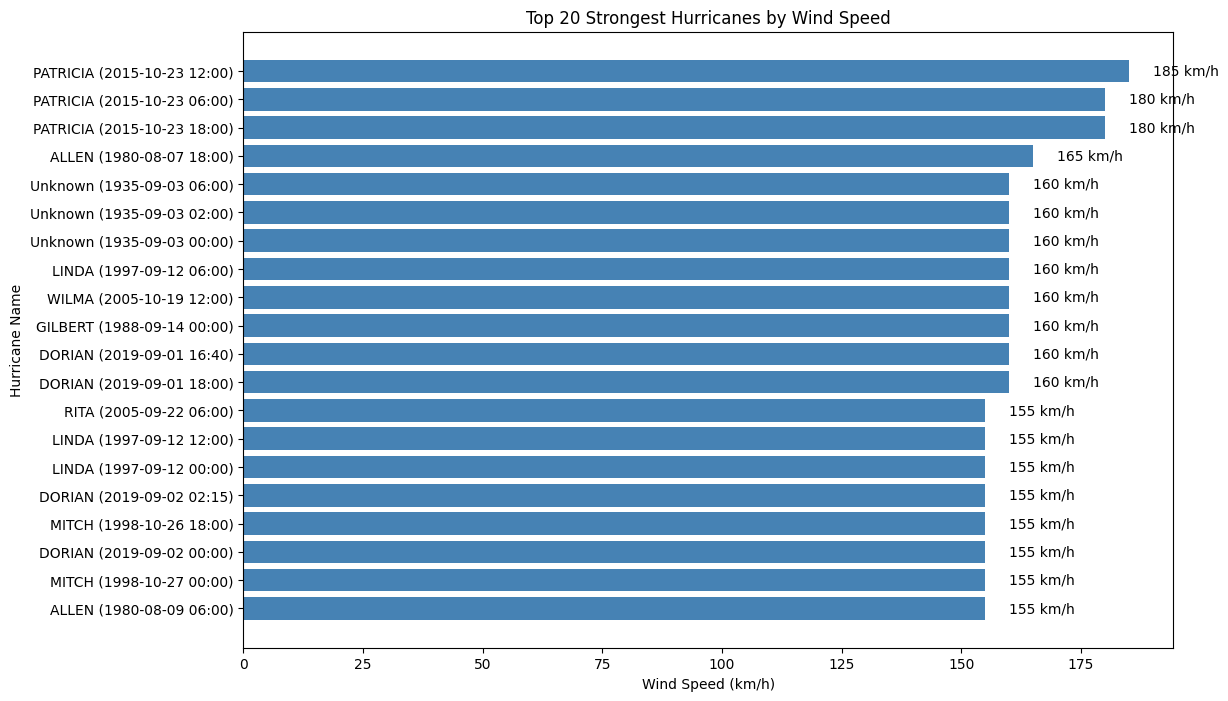

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID', 'NAME', 'WMO_WIND', 'ISO_TIME'], 
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])

# 确保 'WMO_WIND' 列为数值类型，并处理缺失的风速值
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 处理缺失的 'NAME' 列，替换缺失值为 'Unknown'
df['NAME'] = df['NAME'].fillna('Unknown')

# 创建一个新的列，将 'NAME' 和 'ISO_TIME' 组合成唯一的标识符
df['Hurricane_ID'] = df['NAME'] + ' (' + df['ISO_TIME'].dt.strftime('%Y-%m-%d %H:%M') + ')'

# 按照风速（WMO_WIND）降序排序并选择前 20 个风暴
top_20_hurricanes = df.sort_values(by='WMO_WIND', ascending=False).head(20)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_hurricanes['Hurricane_ID'], top_20_hurricanes['WMO_WIND'], color='steelblue')

# 添加数值标签
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f} km/h', va='center', ha='left', fontsize=10)

plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Hurricane Name')
plt.title('Top 20 Strongest Hurricanes by Wind Speed')
plt.gca().invert_yaxis()
plt.show()

### 3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/

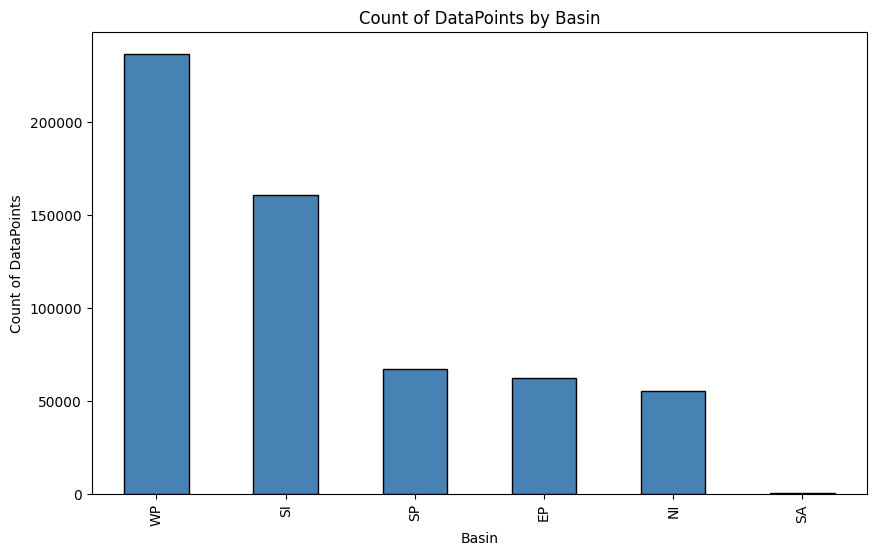

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=['BASIN'], 
                 skiprows=[1, 2],
                 na_values=['NOT_NAMED', 'NAME'])

# 统计每个 Basin 的数据点数量
basin_counts = df['BASIN'].value_counts()

plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Basin')
plt.ylabel('Count of DataPoints')
plt.title('Count of DataPoints by Basin')
plt.show()

### 3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/

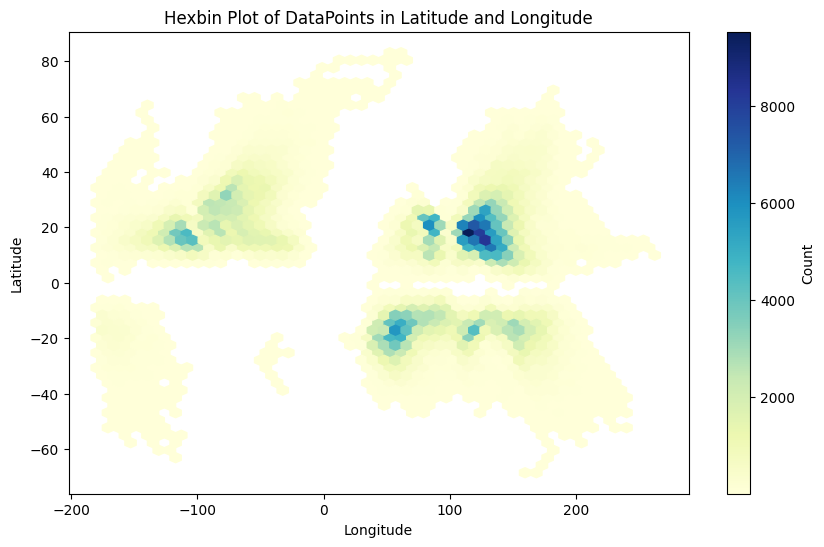

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=['LAT', 'LON'], 
                 skiprows=[1, 2],
                 na_values=['NOT_NAMED', 'NAME'])

# 处理缺失值，将其设为 NaN
df = df.dropna(subset=['LAT', 'LON'])

plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='YlGnBu', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of DataPoints in Latitude and Longitude')
plt.show()

### 3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

/tmp/ipykernel_1995970/734930354.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no long

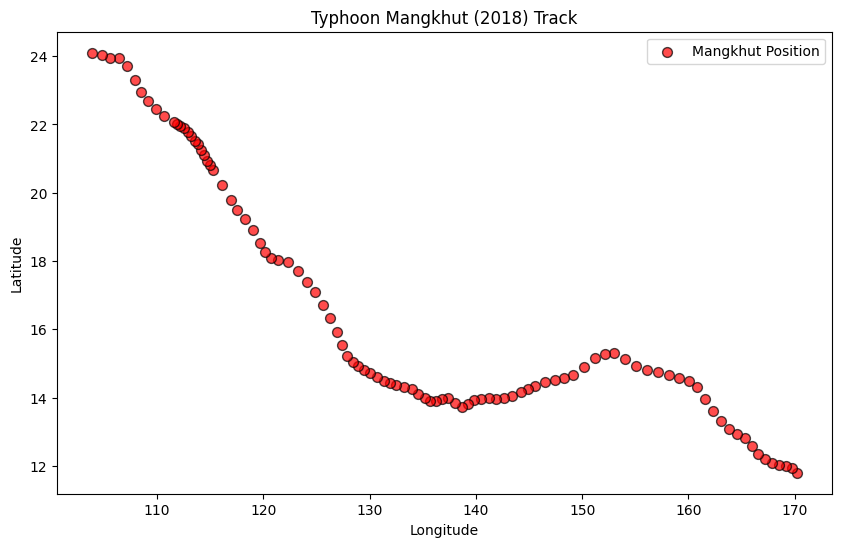

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=['NAME', 'SEASON', 'LAT', 'LON', 'ISO_TIME'], 
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])

# 过滤出 Typhoon Mangkhut 2018 年的数据
mangkhut_data = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)]

plt.figure(figsize=(10, 6))
plt.scatter(mangkhut_data['LON'], mangkhut_data['LAT'], c='red', s=50, alpha=0.7, label='Mangkhut Position', edgecolors='black', zorder=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Typhoon Mangkhut (2018) Track')
plt.legend()
plt.show()

### 3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [14]:
import pandas as pd

df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])

# 过滤出从1970年及以后，且来自 'WP''EP'盆地的数据
filtered_df = df[(df['SEASON'] >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

print(filtered_df)

/tmp/ipykernel_1995970/1424171306.py:3: DtypeWarning: Columns (5,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   
...               ...     ...     ...   ...      ...    ...   
707084  2022275N10316    2022      76    EP       MM  JULIA   
707085  2022275N10316    2022      76    EP       MM  JULIA   
707173  2022286N15151    2022      80    WP       MM    NaN   
707174  2022286N15151    2022      80    WP       MM    NaN   
707175  2022286N15151    2022      80    WP       MM    NaN   

                  ISO_TIME NATURE       LAT      LON  ... BOM_GUST_PER  \
350393 1970-02-19 00:00:00     TS   7.00000  151.400  ...                
350394 1970-02-19 03:00:00     TS   7.24752  151.205  ...                
350395 1970-02-19 06:

### 3.7 [5 points] Plot the number of datapoints per day.

/tmp/ipykernel_1995970/1334101707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canva

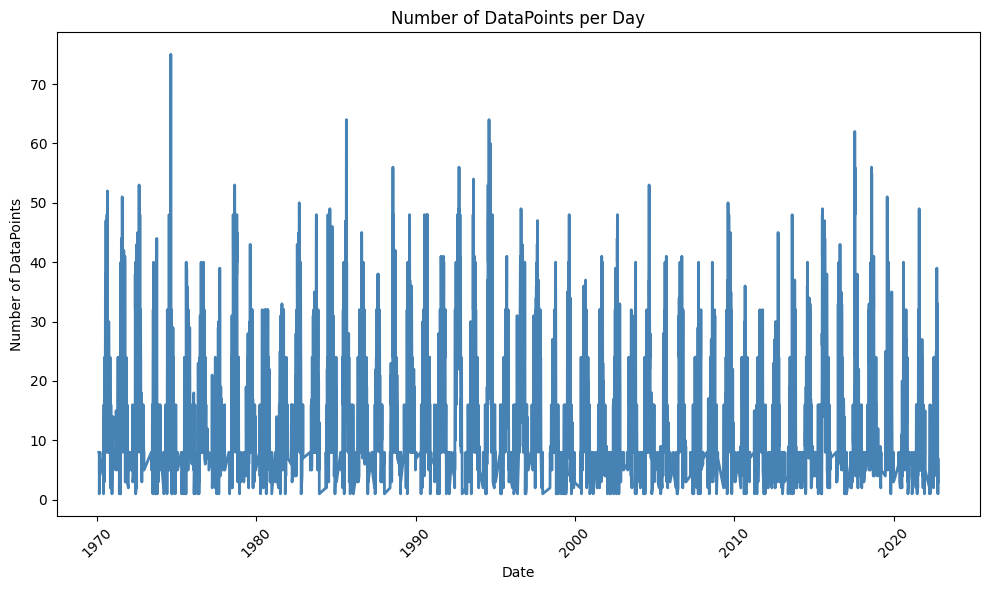

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')

# 将数据按日期分组并统计每个日期的数据点数量
daily_counts = filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()


plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', color='steelblue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Number of DataPoints')
plt.title('Number of DataPoints per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

/tmp/ipykernel_1995970/347279649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')
/tmp/ipykernel_1995970/347279649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DoY'] = filtered_df['ISO_TIME'].dt.dayofyear
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer sup

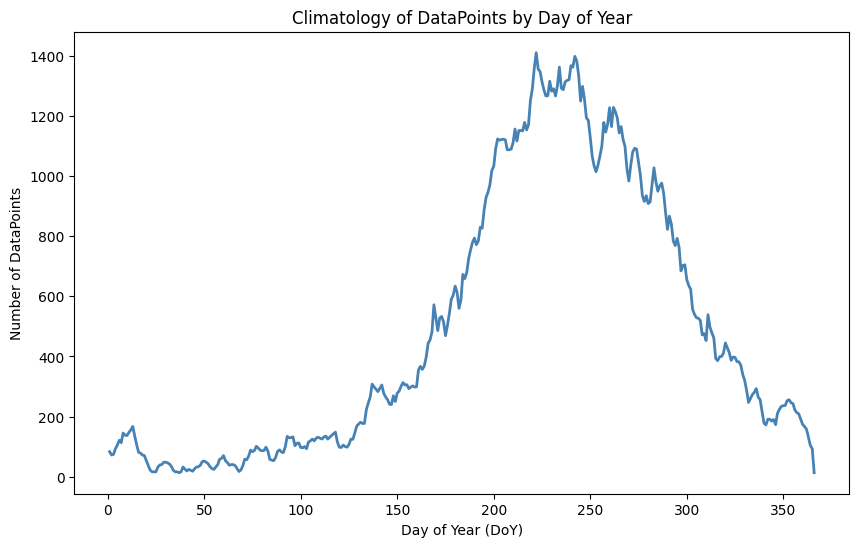

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')

# 提取“日序号” (DoY)，即一年中的第几天
filtered_df['DoY'] = filtered_df['ISO_TIME'].dt.dayofyear

# 按照“日序号”分组并计算每一天的数据点数
doy_counts = filtered_df.groupby('DoY').size()

# 计算气候学平均值：即每一天的平均数据点数
climatology = doy_counts.mean()

plt.figure(figsize=(10, 6))
doy_counts.plot(kind='line', color='steelblue', linewidth=2)
plt.xlabel('Day of Year (DoY)')
plt.ylabel('Number of DataPoints')
plt.title('Climatology of DataPoints by Day of Year')
plt.show()

### 3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

/tmp/ipykernel_1995970/1530433895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')
/tmp/ipykernel_1995970/1530433895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DoY'] = filtered_df['ISO_TIME'].dt.dayofyear
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer s

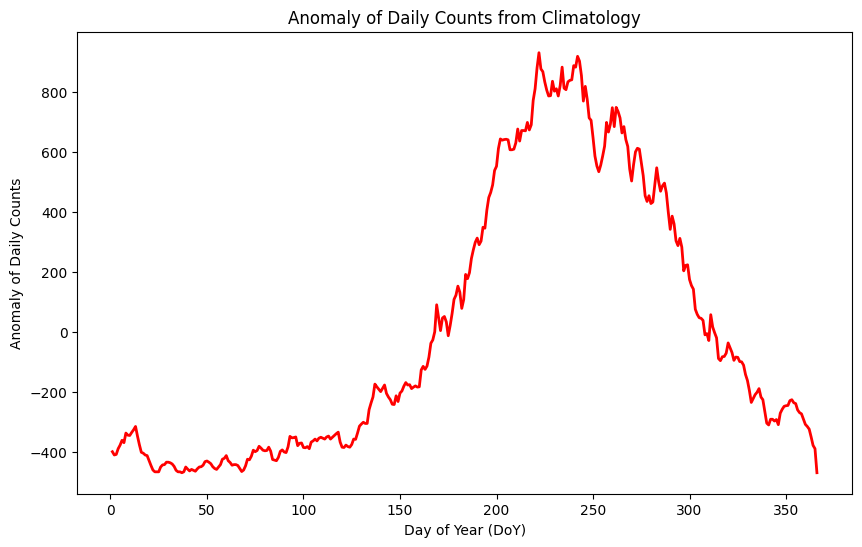

In [ ]:
# BUG: 该小问似乎有问题

import pandas as pd
import matplotlib.pyplot as plt

filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')
filtered_df['DoY'] = filtered_df['ISO_TIME'].dt.dayofyear
doy_counts = filtered_df.groupby('DoY').size()

# 计算每一天的气候学平均值
climatology = doy_counts.mean()

# 计算异常值：每日的数据点数 - 对应的气候学值
anomaly = doy_counts - climatology

plt.figure(figsize=(10, 6))
anomaly.plot(kind='line', color='red', linewidth=2)
plt.xlabel('Day of Year (DoY)')
plt.ylabel('Anomaly of Daily Counts')
plt.title('Anomaly of Daily Counts from Climatology')
plt.show()

### 3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

/tmp/ipykernel_1995970/3577616499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Anomaly'] = filtered_df['DoY'].map(anomaly)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, *

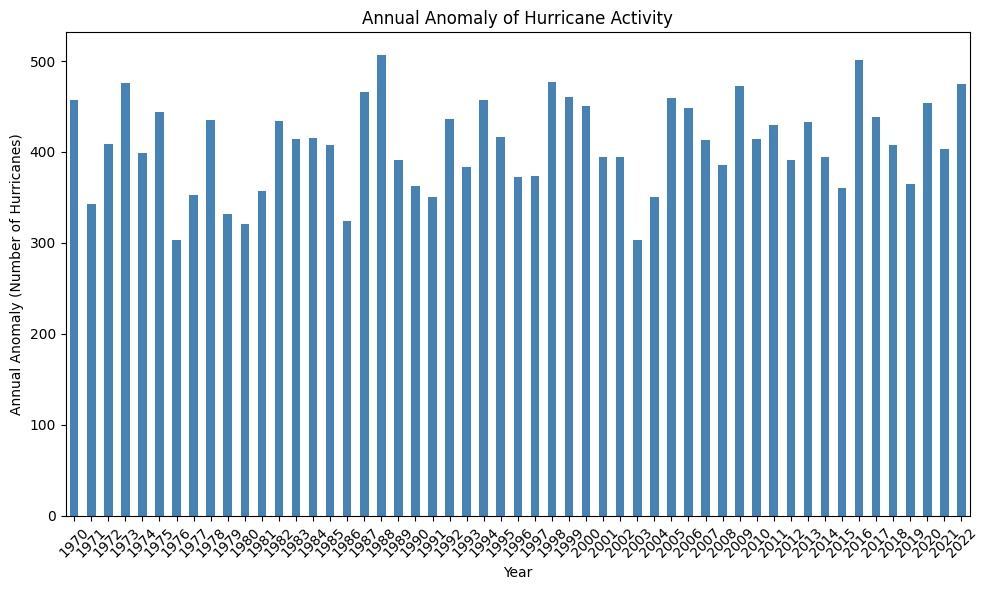

Anomalous Years:
ISO_TIME
1970-12-31    457.066888
1972-12-31    408.225169
1973-12-31    475.881841
1975-12-31    443.651276
1978-12-31    435.703833
1982-12-31    434.436962
1983-12-31    414.336380
1984-12-31    415.574410
1985-12-31    407.958279
1987-12-31    466.022187
1988-12-31    506.250248
1992-12-31    435.921032
1994-12-31    457.251778
1995-12-31    416.700890
1998-12-31    477.134892
1999-12-31    460.341938
2000-12-31    450.189315
2005-12-31    459.759719
2006-12-31    448.652516
2007-12-31    412.761024
2009-12-31    472.234662
2010-12-31    414.460585
2011-12-31    430.210356
2013-12-31    432.889880
2016-12-31    501.429280
2017-12-31    438.190540
2020-12-31    454.215825
2022-12-31    474.779884
Name: Anomaly, dtype: float64


In [ ]:
# BUG

import pandas as pd
import matplotlib.pyplot as plt

# 将异常值与原始日期对齐
filtered_df['Anomaly'] = filtered_df['DoY'].map(anomaly)

# 按年度重采样并计算每年的异常值均值
annual_anomaly = filtered_df.resample('A', on='ISO_TIME')['Anomaly'].mean()

# 绘制年度异常值图
plt.figure(figsize=(10, 6))
annual_anomaly.plot(kind='bar', color='steelblue')
plt.xticks(ticks=range(len(annual_anomaly)), labels=annual_anomaly.index.year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Annual Anomaly (Number of Hurricanes)')
plt.title('Annual Anomaly of Hurricane Activity')
plt.tight_layout()
plt.show()

# 输出哪些年份的飓风活动异常
anomalous_years = annual_anomaly[annual_anomaly.abs() > annual_anomaly.mean()]
print("Anomalous Years:")
print(anomalous_years)

## 4. Explore a data set

Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

### 4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

In [19]:
df = pd.read_csv('USC00218450.csv')

print(df.columns)
# 处理缺失值，将其设为 NaN
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
# 用均值填充缺失值
df['PRCP'] = df['PRCP'].fillna(df['PRCP'].mean())
df['SNOW'] = df['SNOW'].fillna(df['SNOW'].mean())
# 删除缺失值的行
df = df.dropna(subset=['TAVG'])
df['DATE'] = pd.to_datetime(df['DATE'])  # 确保 'Date' 列是时间戳格式

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'CDSD',
       'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES',
       ...
       'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES'],
      dtype='object', length=178)


### 4.2 [5 points] Plot the time series of a certain variable.

<bound method NDFrame.head of          STATION     DATE  LATITUDE  LONGITUDE  ELEVATION  \
0    USC00218450  1960-10   44.9902  -93.17995      295.7   
1    USC00218450  1960-11   44.9902  -93.17995      295.7   
2    USC00218450  1960-12   44.9902  -93.17995      295.7   
3    USC00218450  1961-01   44.9902  -93.17995      295.7   
4    USC00218450  1961-02   44.9902  -93.17995      295.7   
..           ...      ...       ...        ...        ...   
762  USC00218450  2024-04   44.9902  -93.17995      295.7   
763  USC00218450  2024-05   44.9902  -93.17995      295.7   
764  USC00218450  2024-06   44.9902  -93.17995      295.7   
765  USC00218450  2024-07   44.9902  -93.17995      295.7   
766  USC00218450  2024-08   44.9902  -93.17995      295.7   

                                 NAME   CDSD CDSD_ATTRIBUTES   CLDD  \
0    UNIVERSITY OF MN ST. PAUL, MN US    NaN             NaN    NaN   
1    UNIVERSITY OF MN ST. PAUL, MN US    NaN             NaN    NaN   
2    UNIVERSITY OF MN ST

/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/dwzhao/software/anaconda3/lib/python3.11/site-packages/IPython/core/

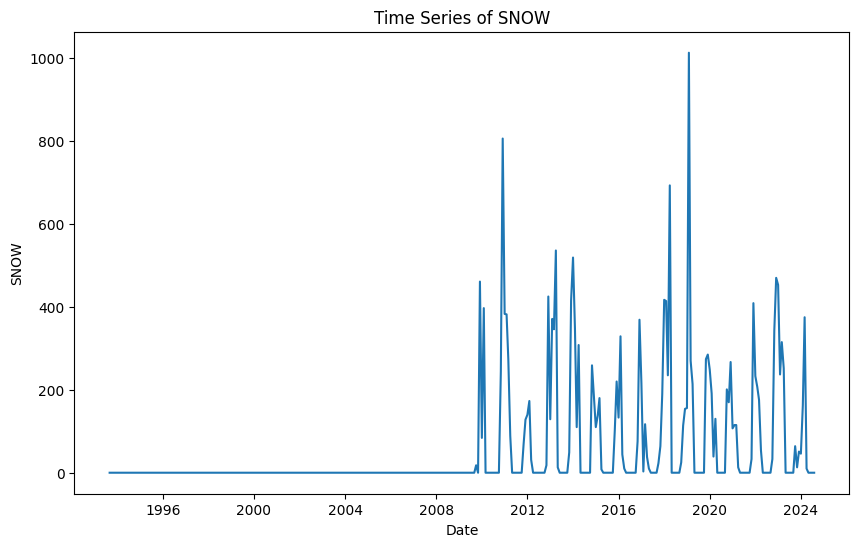

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('USC00218450.csv')

print(df.head)
# 处理缺失值，将其设为 NaN
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
# 删除缺失值的行
df = df.dropna(subset=['TAVG'])
df = df.dropna(subset=['PRCP'])
df = df.dropna(subset=['SNOW'])

df['DATE'] = pd.to_datetime(df['DATE'])  # 确保 'Date' 列是时间戳格式
df.set_index('DATE', inplace=True)  # 设置 'Date' 列为索引

# 绘制 SNOW 时间序列图
plt.figure(figsize=(10, 6))
plt.plot(df['SNOW'])
plt.title('Time Series of SNOW')
plt.xlabel('Date')
plt.ylabel('SNOW')
plt.show()

### 4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

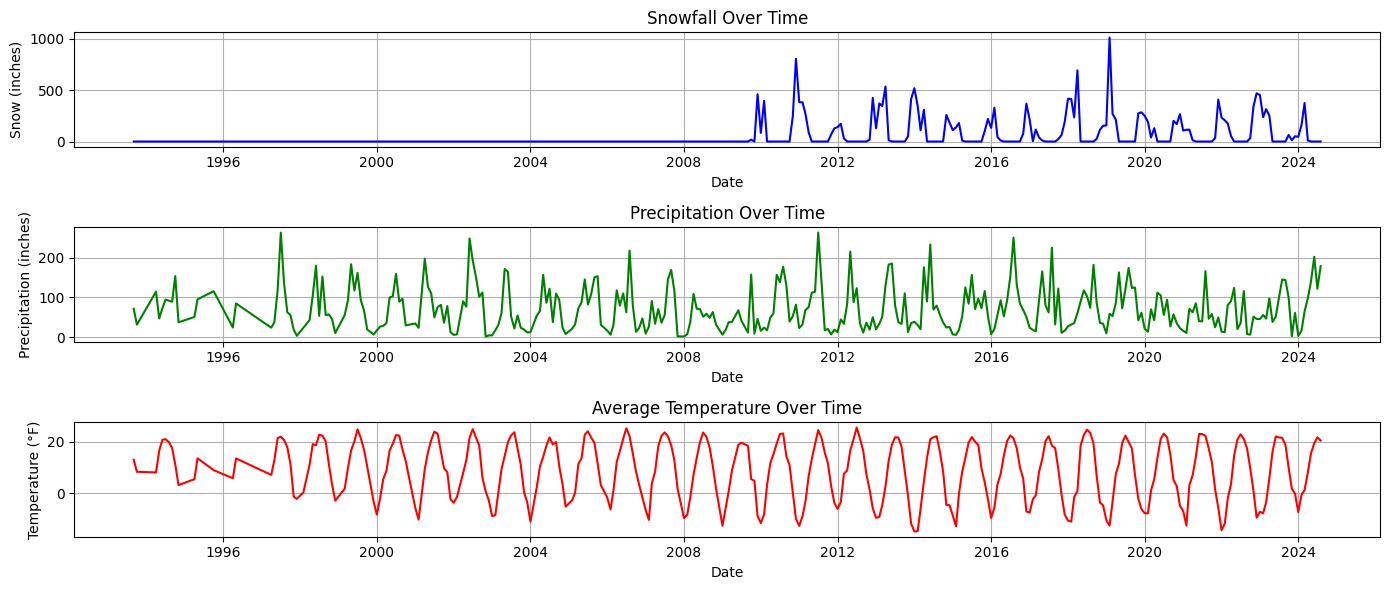

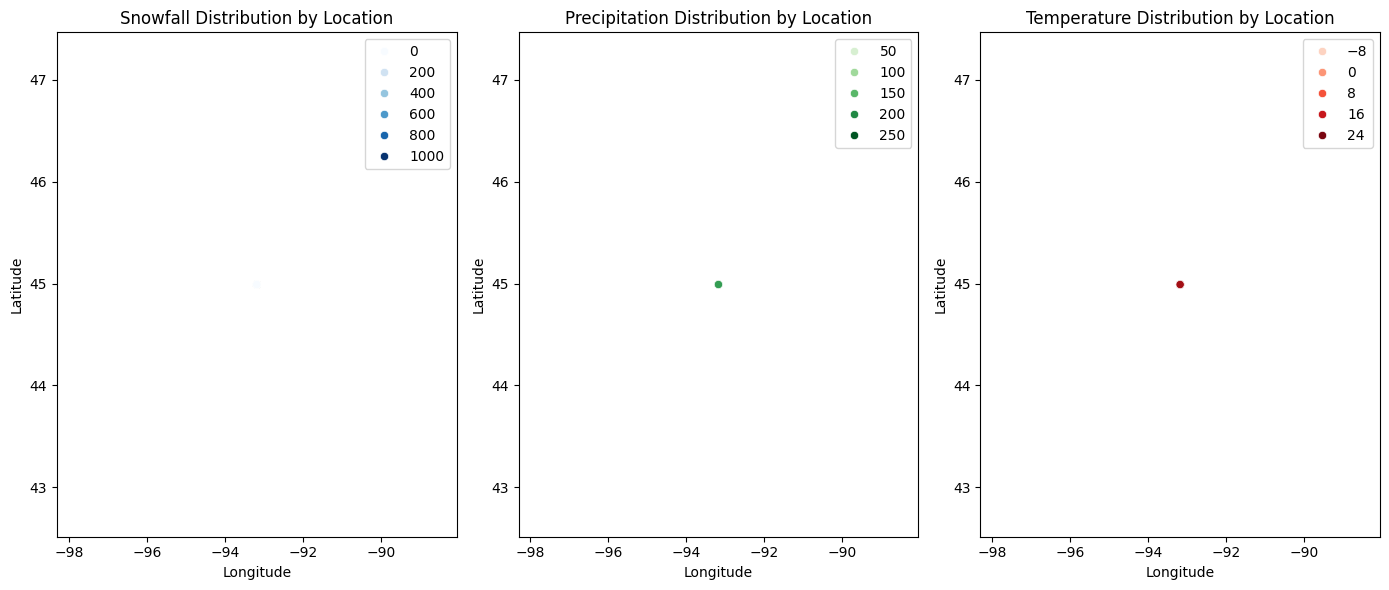

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv('USC00218450.csv')

# 将 'DATE' 列转换为 datetime 类型，使用 '%Y-%m' 格式表示只有年月
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m')

# 选择需要分析的列
columns = ['DATE', 'LATITUDE', 'LONGITUDE', 'SNOW', 'PRCP', 'TAVG']

# 去除含有缺失值的行
data_clean = data[columns].dropna()

# 根据年月绘制降雪量、降水量和温度变化趋势图
plt.figure(figsize=(14, 6))

# 降雪量随时间变化
plt.subplot(3, 1, 1)
plt.plot(data_clean['DATE'].values, data_clean['SNOW'].values, label='Snow', color='blue')  # 转换为 numpy 数组
plt.title('Snowfall Over Time')
plt.xlabel('Date')
plt.ylabel('Snow (inches)')
plt.grid(True)

# 降水量随时间变化
plt.subplot(3, 1, 2)
plt.plot(data_clean['DATE'].values, data_clean['PRCP'].values, label='Precipitation', color='green')  # 转换为 numpy 数组
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)

# 平均温度随时间变化
plt.subplot(3, 1, 3)
plt.plot(data_clean['DATE'].values, data_clean['TAVG'].values, label='Avg Temperature', color='red')  # 转换为 numpy 数组
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 根据经纬度绘制降水量、降雪量和温度的散点图
plt.figure(figsize=(14, 6))

# 降雪量与经纬度的关系
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_clean['LONGITUDE'].values, y=data_clean['LATITUDE'].values, hue=data_clean['SNOW'].values, palette='Blues')
plt.title('Snowfall Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 降水量与经纬度的关系
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_clean['LONGITUDE'].values, y=data_clean['LATITUDE'].values, hue=data_clean['PRCP'].values, palette='Greens')
plt.title('Precipitation Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 平均温度与经纬度的关系
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_clean['LONGITUDE'].values, y=data_clean['LATITUDE'].values, hue=data_clean['TAVG'].values, palette='Reds')
plt.title('Temperature Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [ ]:
data_clean # 经纬度似乎没变化导致后三个的plt看不出差异

,DATE,LATITUDE,LONGITUDE,SNOW,PRCP,TAVG
395,1993-09-01,44.9902,-93.17995,0.0,71.4,13.05
396,1993-10-01,44.9902,-93.17995,0.0,31.3,8.40
402,1994-04-01,44.9902,-93.17995,0.0,114.6,8.16
403,1994-05-01,44.9902,-93.17995,0.0,47.2,16.63
404,1994-06-01,44.9902,-93.17995,0.0,73.0,20.87
...,...,...,...,...,...,...
762,2024-04-01,44.9902,-93.17995,10.0,97.9,8.12
763,2024-05-01,44.9902,-93.17995,0.0,140.6,15.62
764,2024-06-01,44.9902,-93.17995,0.0,202.9,19.47
765,2024-07-01,44.9902,-93.17995,0.0,122.2,21.82
